# What is the average steps needed for $n$ sensors to hit the source using spherical uniform random walk?(Random walk with uniformly random direction and fixed step size)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def random_unit_vec(n):
    # Return a stack of n uniformly random unit row vectors
    rand_theta = np.random.uniform(0,2*np.pi,n)

    return np.array([np.cos(rand_theta),np.sin(rand_theta)]).T



In [96]:
N_sensors = 6
initial_dispersion_width = 3 


N_iter=600
N_trials = 1000

contact_threshold = 0.1

max_linear_speed = 0.1

initial_dists = [2,4,6,8,10]

means = []
medians = []
for initial_dist in initial_dists:
    
    counts = []
    
    q = np.array([0,initial_dist])

    for _ in range(N_trials):
        count = 0
        p = (np.random.rand(N_sensors,2)-0.5)*initial_dispersion_width

        for _ in range(N_iter):
            dist = np.linalg.norm(p-q,axis=-1)

            if np.any(dist<contact_threshold):
                break
            else:
                count+=1
                p += max_linear_speed * random_unit_vec(N_sensors) 

        counts.append(count)
        
        
    means.append(np.mean(counts))
    medians.append(np.median(counts))

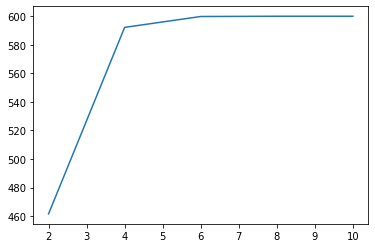

In [97]:
plt.plot(initial_dists,means)

In [99]:
means

[461.519, 592.198, 599.817, 600.0, 600.0]

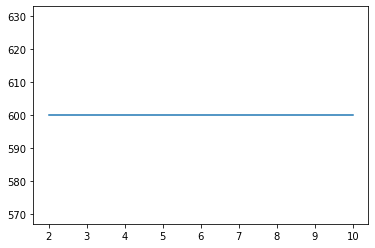

In [100]:
plt.plot(initial_dists,medians)

In [101]:
medians

[600.0, 600.0, 600.0, 600.0, 600.0]